In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, r2_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [28]:
df = pd.read_csv("../0.Datasets/processed/processed_car_data.csv")

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [29]:
# here we create new column good_buy or not cause our dataset no feasible for logistic regg

df['good_buy'] = np.where(df['mmr'] > df['sellingprice'], 'No', 'Yes')

In [30]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date,good_buy
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00,Yes
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00,Yes
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00,No
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00,Yes
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00,Yes


In [31]:
#COMMENT THIS FOR FULL DATASET
df = df.iloc[20:60, :]

In [32]:

x = df[['condition','sellingprice','odometer','mmr']]

# x

,condition,sellingprice,odometer,mmr
20,19.000000,7200.0,14538.0,24300.0
21,29.000000,30000.0,25969.0,34200.0
22,30.672365,14700.0,33450.0,20100.0
23,49.000000,23750.0,5826.0,24000.0
24,38.000000,65000.0,10736.0,67000.0
25,30.672365,8500.0,9281.0,15150.0
26,42.000000,32500.0,16506.0,32100.0
27,48.000000,32500.0,12725.0,32300.0
28,30.672365,34000.0,11278.0,50400.0
29,42.000000,19500.0,11874.0,22200.0


In [33]:
y = df['good_buy']
# y

20     No
21     No
22     No
23     No
24     No
25     No
26    Yes
27    Yes
28     No
29     No
30     No
31     No
32    Yes
33     No
34    Yes
35     No
36    Yes
37     No
38     No
39     No
40     No
41     No
42     No
43     No
44     No
45     No
46     No
47     No
48     No
49    Yes
50     No
51     No
52    Yes
53     No
54    Yes
55     No
56     No
57     No
58     No
59    Yes
Name: good_buy, dtype: object

In [34]:
le = LabelEncoder()

In [35]:
y_encoded = le.fit_transform(y)

In [36]:
y_encoded

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y_encoded, test_size=0.3, random_state=42)

In [38]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0])

In [39]:
x_train

,condition,sellingprice,odometer,mmr
33,38.000000,44500.0,5875.0,46500.0
51,30.672365,11600.0,10678.0,15150.0
54,42.000000,40000.0,5304.0,39500.0
28,30.672365,34000.0,11278.0,50400.0
37,5.000000,30500.0,111.0,32200.0
44,30.672365,2000.0,38261.0,11450.0
20,19.000000,7200.0,14538.0,24300.0
53,1.000000,11500.0,4314.0,15500.0
25,30.672365,8500.0,9281.0,15150.0
31,42.000000,47500.0,9606.0,48600.0


In [40]:
log_reg = LogisticRegression()


In [41]:
strat_time = time.time()

log_reg.fit(x_train, y_train)

end_time = time.time()

print(f"execution time {end_time - strat_time}")

execution time 0.029241561889648438


In [42]:
y_predict = log_reg.predict(x_test)
y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [43]:
print(np.array(y_test))

[0 1 0 0 0 1 0 0 1 1 0 0]


In [44]:
#38.000000	44500.0	5875.0	46500.0
print(log_reg.predict([[38.000000, 45000,5875,46500]]))

[0]


c:\Users\AjayPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



Text(0.5, 1.0, 'Classification Report')

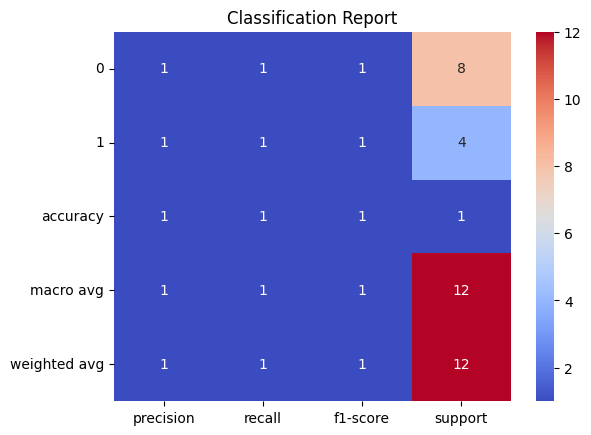

In [46]:

report = classification_report(y_test, y_predict, output_dict= True)

sns.heatmap(pd.DataFrame(report).transpose(), annot=True, cmap= 'coolwarm')
plt.title('Classification Report')


In [47]:
print(accuracy_score(y_test, y_predict))

1.0


In [48]:
matrix = confusion_matrix(y_test, y_predict)
matrix

array([[8, 0],
       [0, 4]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Good buy or not')

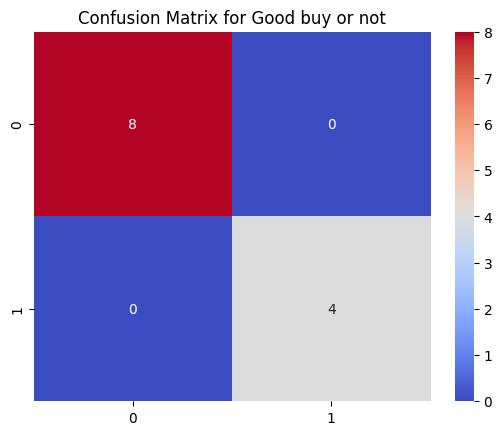

In [49]:
sns.heatmap(matrix, annot=True, cmap ='coolwarm')
plt.title('Confusion Matrix for Good buy or not')

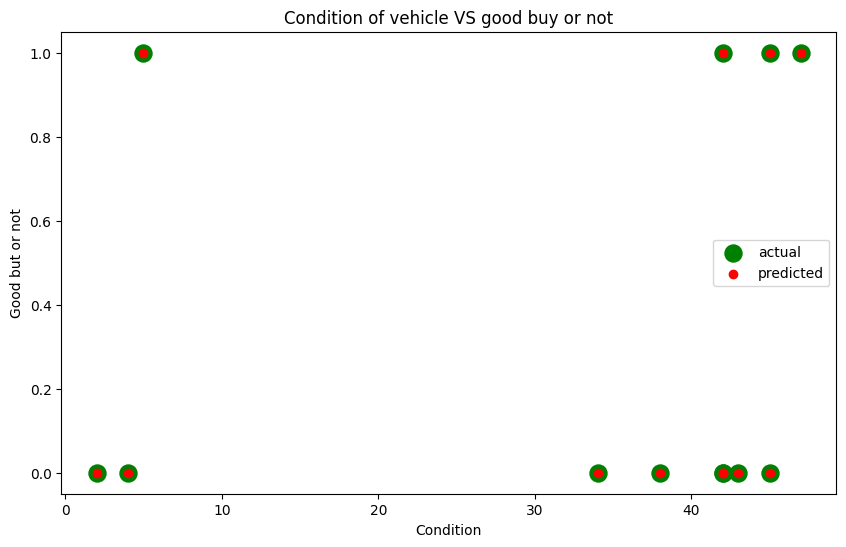

In [50]:
plt.figure(figsize = (10,6))

plt.scatter(x_test['condition'], y_test, label ='actual', color='green', s =150)
plt.scatter(x_test['condition'], y_predict, label= 'predicted', color = 'red')

plt.xlabel('Condition')
plt.ylabel('Good but or not')
plt.title("Condition of vehicle VS good buy or not")

plt.legend()
# plt.grid()
plt.savefig("./Graph/1.good_buy_on_condition.png")
plt.show()

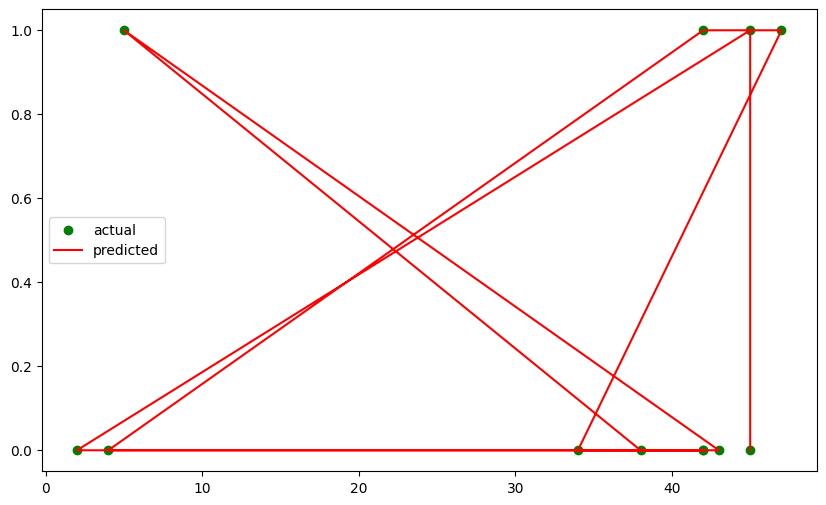

In [51]:
plt.figure(figsize = (10,6))

plt.scatter(x_test['condition'], y_test, label ='actual', color='green')
plt.plot(x_test['condition'], y_predict, label= 'predicted', color = 'red')
plt.legend()

plt.show()

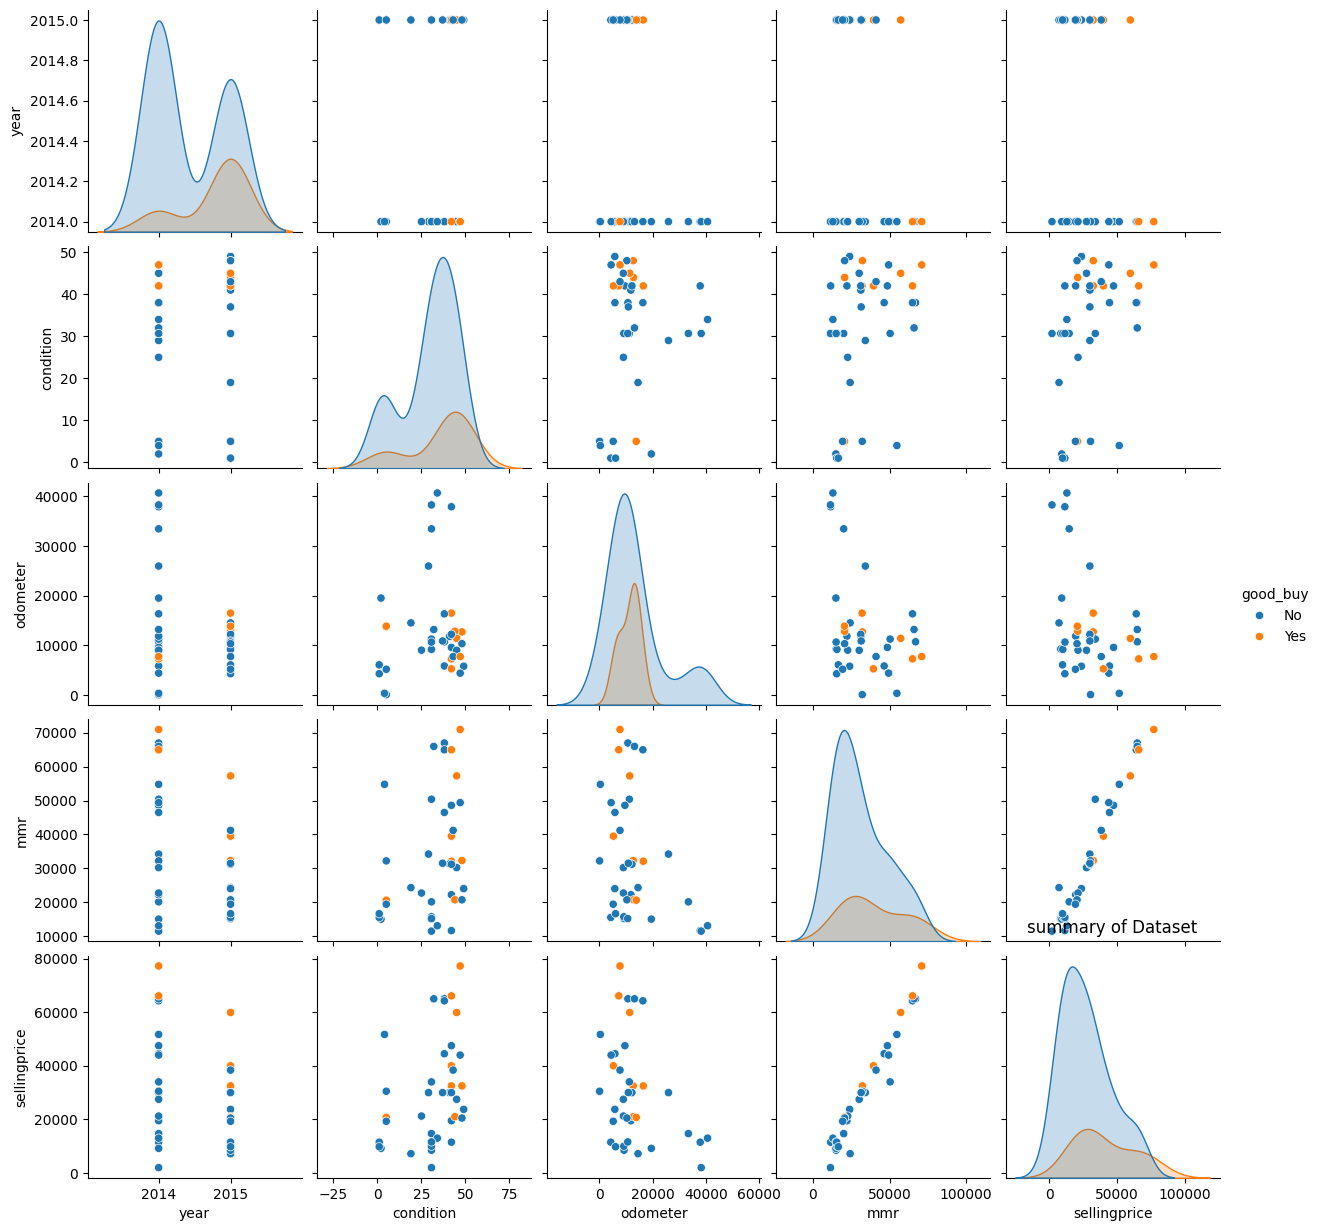

In [52]:
sns.pairplot(df, hue='good_buy')

plt.title("summary of Dataset")

plt.savefig('./Graph/1.summary_of_df.png')
plt.show()
